In [54]:
import logging, sys
import seaborn as sns
import pandas as pd
import sqlite3
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Load tweets from Database

In [55]:
try:
    connection = sqlite3.connect("../data/project.sqlite")
    tweets = pd.read_sql_query(f"SELECT * FROM tweets", connection)
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

Data Analysis

In [56]:
tweets.isnull().values.any()

False

<Axes: xlabel='target', ylabel='count'>

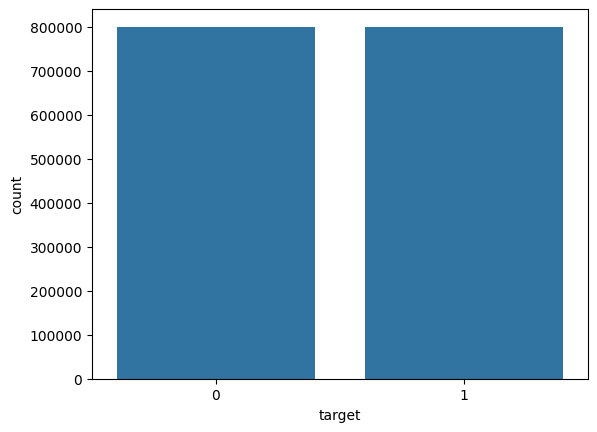

In [57]:
sns.countplot(x="target", data=tweets)

In [58]:
positive_tweet = tweets[tweets.target == 1]["processed_text"]
negative_tweet = tweets[tweets.target == 0]["processed_text"]
tweets[tweets.target == 1]["processed_text"].iloc[1]

'im meet one besti tonight cant wait girl talk'

(-0.5, 399.5, 199.5, -0.5)

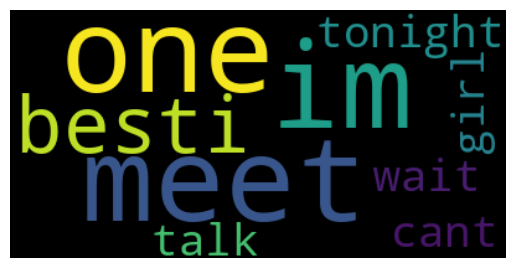

In [59]:
wordcloud = WordCloud().generate(positive_tweet.iloc[1])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Data Preprocessing

In [60]:
tweets.iloc[0]["processed_text"]

'upset updat facebook text might cri result school today also blah'

In [61]:
X = tweets["processed_text"].values
Y = tweets["target"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Convert text data into numerical data

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999,) (320000,)


In [63]:
vectorizer = TfidfVectorizer()

In [64]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [65]:
model = LogisticRegression(max_iter=2000)
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999, 191798) (320000, 191798)


In [66]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

Model Evaluation

In [67]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Training accuracy:", training_accuracy)

Training accuracy: 0.7924178065764114


In [68]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.774853125


In [69]:
try:
    connection = sqlite3.connect("../data/project.sqlite")
    song_lyrics = pd.read_sql_query(f"SELECT * FROM song_lyrics", connection)
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

In [70]:
index = 700
data_point = song_lyrics.iloc[index]
actual_label = data_point["label"]
data_point = [data_point["processed_lyrics"]]
data_point_vectorized = vectorizer.transform(data_point)
prediction = model.predict(data_point_vectorized)
print("Prediction: ", prediction, "Label on data: ", actual_label, "Lyrics: ", song_lyrics.iloc[index]["lyrics"])

Prediction:  [0] Label on data:  0.7170000000000001 Lyrics:  What a lovely trip
I'm feeling so fresh and alive
And I'm so glad to arrive
It's all so grand
It's easy to see you don't need a palace
To feel like Alice in Wonderland

Back in Ohio where I come from
I've done a lot of dreaming and I've travelled some
But I never thought I'd see the day
When I ever took a ride on the Santa Fe
(want to take a ride on the Santa Fe)

I would lean across my windowsill
And hear the whistle echoing across the hill
Then I'd watch the lights till they fade away
On the Atchison, Topeka and the Santa Fe

What a thrill (what a great big wonderful thrill)
With the wheels singing "westward ho"
Right from the day I heard them start
'Cross the Kansas plains from New Mexico
I guess I've got a little gypsy in my heart

When I'm old and grey and settled down
If I ever get a chance to sneak away from town
Then I'll spend my busman's holiday
On the Atchison, Topeka and the Santa Fe

All aboard! (we came across t

In [74]:
prediction = model.predict_proba(data_point_vectorized)
prediction

array([[0.53501553, 0.46498447]])

(-0.5, 399.5, 199.5, -0.5)

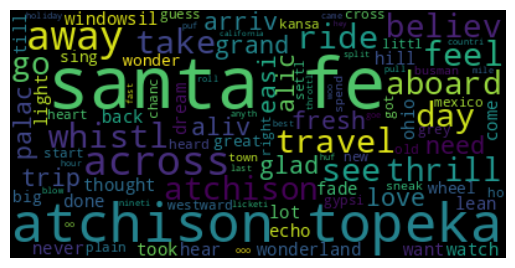

In [77]:
wordcloud = WordCloud().generate(song_lyrics.iloc[index]["processed_lyrics"])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
